Goal here is to produce the visits lists (obsID, fID, band) for visits that fall in WFD, uDDF footprint. 

3 specific scenarios:
- WFD visits in WFD footprint
- DD visits in uDDF footprint
- WFD visits in uDDF footprint

A csv file with relevant info is saved for each visit.

Also, gifs are produced to check the first 100 visits in each case.

Requires https://github.com/humnaawan/DC1-Regions to be set up.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import healpy as hp
from copy import deepcopy
from os.path import expanduser
home = expanduser("~")
import time

In [2]:
repoDir= os.getcwd()
print(repoDir)

/Users/humnaawan/repos/DC2_Repo/scripts/visitGen


#### Set up the regions

In [3]:
regionCorners= {}
regionCorners['WFD']= [[57.87, -27.25], [58.02, -32.25], [52.11, -32.25], [52.25, -27.25]]
regionCorners['DD']= [[53.764, -27.533], [53.771, -28.667], [52.479, -28.667], [52.486, -27.533]]

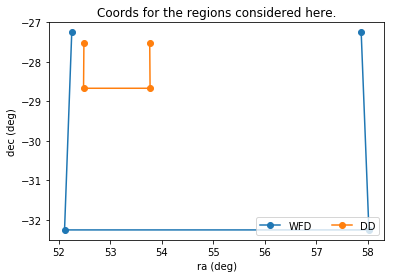

In [4]:
# plot the regions to check whats up
for key in regionCorners.keys():    
    xs, ys= [], []
    for x, y in regionCorners[key]:
        xs.append(x)
        ys.append(y)
    plt.plot(xs, ys, 'o-', label= key)
plt.legend(loc="lower right", ncol= 2)
plt.title('Coords for the regions considered here.')
plt.xlabel('ra (deg)')
plt.ylabel('dec (deg)')
plt.show()

#### Find the visits.

In [5]:
# simdata datapath
mainDir= home+'/lsstData/'
dbpath= mainDir+'minion_1016_desc_dithered_v3.db'   # new afterburner output

In [6]:
# set up
pointingRACol= 'descDitheredRA'
pointingDecCol= 'descDitheredDec'
simDataTag= 'minion1016_v3'
nside= 512

In [7]:
# where the data will be saved
outDir= '%s/../../protoDC2Visits_nside%s/'%(repoDir, nside)

In [8]:
from DC2_visitListCode import getDC2VisitList

In [9]:
simdata, regionPixels, obsIDsList, fIDsList, bandList= {}, {}, {}, {}, {}

In [10]:
# get WFD visits that fall in the WFD footprint
startTime= time.time()
surveyRegionTag= 'WFD'

out= getDC2VisitList(dbpath, simDataTag, surveyRegionTag, pointingRACol, pointingDecCol,
                     outDir, nside, regionCorners[surveyRegionTag],
                    filters= ['u', 'g', 'r', 'i', 'z', 'y'], outFileTag= 'WFDvisitsInWFD')

simdata[surveyRegionTag], regionPixels[surveyRegionTag], obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag]= out

print('\nTime taken (s): %.3f'%(time.time()-startTime))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with no constraint.
Found 2194905 visits
Running:  ['pixelGrid']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

Finding the visit list.
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes

##Total number of unique visits in the region (across all bands): 8389

Total number of unique visits in the region for u band: 572
fIDs: [1178 1188 1214 1226 1277 1297 1309 1331 1401 1419 1427 1445 1522 1546 1566]

Total number of unique visits in the region for g band: 822
fIDs: [1178 1188 1214 1226 1277 1297 1309 1331 1401 1419 1427 1445 1522 1546 1566]

Total number of unique visits in the region for r band: 1825
fIDs: [1178 1188 1214 1226 1277 1297 1309 1331 1401 1419 1427 1445 1522 1546 1566]

Total number of unique visits in the region for i band: 1855
fIDs: [1178 1188 1214 1226 1277 1297 1309 1331 1401 1419 1427 1445 1522 1546 1566]


In [11]:
# get DD visits that fall in the uDDF footprint
startTime= time.time()
surveyRegionTag= 'DD'

out= getDC2VisitList(dbpath, simDataTag, surveyRegionTag, pointingRACol, pointingDecCol,
                     outDir, nside, regionCorners[surveyRegionTag],
                    filters= ['u', 'g', 'r', 'i', 'z', 'y'], outFileTag= 'DDvisitsInuDD')

simdata[surveyRegionTag], regionPixels[surveyRegionTag], obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag]= out
print('\nTime taken (s): %.3f'%(time.time()-startTime))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with no constraint.
Found 2194905 visits
Running:  ['pixelGrid']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

Finding the visit list.
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes

##Total number of unique visits in the region (across all bands): 23160

Total number of unique visits in the region for u band: 4963
fIDs: [1427]

Total number of unique visits in the region for g band: 1911
fIDs: [1427]

Total number of unique visits in the region for r band: 3796
fIDs: [1427]

Total number of unique visits in the region for i band: 3818
fIDs: [1427]

Total number of unique visits in the region for z band: 4930
fIDs: [1427]

Total number of unique visits in the region for y band: 3742
fIDs: [1427]

Saved data in DC2VisitList_minion1016_v3_DDvisits_nside512_DDvisitsInuDD.csv.
Outdir: /Users/humnaawan/repos/DC2_Repo/scripts/

In [13]:
# get WFD visits that fall in the uDDF footprint
startTime= time.time()
surveyRegionTag= 'WFD'

out= getDC2VisitList(dbpath, simDataTag, surveyRegionTag, pointingRACol, pointingDecCol,
                     outDir, nside, regionCorners['DD'],
                    filters= ['u', 'g', 'r', 'i', 'z', 'y'], outFileTag= 'WFDvisitsInuDD')

surveyRegionTag= 'WFD_inDD'
simdata[surveyRegionTag], regionPixels[surveyRegionTag], obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag]= out

print('\nTime taken (s): %.3f'%(time.time()-startTime))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with no constraint.
Found 2194905 visits
Running:  ['pixelGrid']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

Finding the visit list.
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes

##Total number of unique visits in the region (across all bands): 2307

Total number of unique visits in the region for u band: 158
fIDs: [1309 1331 1419 1427 1445 1546 1566]

Total number of unique visits in the region for g band: 218
fIDs: [1309 1331 1419 1427 1445 1546 1566]

Total number of unique visits in the region for r band: 505
fIDs: [1309 1331 1419 1427 1445 1546 1566]

Total number of unique visits in the region for i band: 514
fIDs: [1309 1331 1419 1427 1445 1546 1566]

Total number of unique visits in the region for z band: 457
fIDs: [1309 1331 1419 1427 1445 1546 1566]

Total number of unique visits in the region for y band: 4

#### Plot the sims for checks.

In [14]:
from DC2_visitsSim import DC2VisitsSim

In [15]:
ras, decs= [], []
for key in regionCorners:
    for i in regionCorners[key]:
        ras.append(i[0])
        decs.append(i[1])
    
minRA, maxRA= min(ras), max(ras)
minDec, maxDec= min(decs), max(decs)

In [16]:
surveyRegionTag= 'WFD'
DC2VisitsSim(outDir+'gifs/', 'WFD_test', simdata[surveyRegionTag], pointingRACol, pointingDecCol,
                 obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag],
                 regionPixels_WFD= regionPixels['WFD'], regionPixels_DD= regionPixels['DD'],
                 nside= nside,
                 obsHistIndMin= 0, obsHistIndMax= 100,
             minRA= minRA, maxRA= maxRA, minDec= minDec, maxDec= maxDec)

Saved  hIDs_0-100Index_WFD_test_nside512.gif


In [17]:
surveyRegionTag= 'DD'
DC2VisitsSim(outDir+'gifs/', 'uDD_test', simdata[surveyRegionTag], pointingRACol, pointingDecCol,
                 obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag],
                 regionPixels_WFD= regionPixels['WFD'], regionPixels_DD= regionPixels['DD'],
                 nside= nside,
                 obsHistIndMin= 0, obsHistIndMax= 100,
             minRA= minRA, maxRA= maxRA, minDec= minDec, maxDec= maxDec)

Saved  hIDs_0-100Index_uDD_test_nside512.gif


In [18]:
surveyRegionTag= 'WFD_inDD'
DC2VisitsSim(outDir+'gifs/', 'WFDinUDD_test', simdata[surveyRegionTag], pointingRACol, pointingDecCol,
                 obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag],
                 regionPixels_WFD= regionPixels['WFD'], regionPixels_DD= regionPixels['DD'],
                 nside= nside,
                 obsHistIndMin= 0, obsHistIndMax= 100,
             minRA= minRA, maxRA= maxRA, minDec= minDec, maxDec= maxDec)

Saved  hIDs_0-100Index_WFDinUDD_test_nside512.gif
